# Importando as bibliotecas e os arquivos

Assim que o arquivo JSON com as informações é obtido, para o caso analisado, diretamente do site do desafio, foi realizado a preparação do ambiente com a importação das bibliotecas que serão utilizadas, para então, seguir com a análise e a importação dos dados, pela maneira que o arquivo JSON é organizado, a leitura irá gerar colunas com a presença de dicionários, porém, usualmente optamos pela realização da normalização, mas para o caso desse projeto iremos realizar listagem dos itens presentes e será inserido as colunas resultantes no dataframe inicial, gerando portanto o nosso dataframe que será a base de todo o projeto de tratamento e análise de dados

In [2]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

# preprocessing and machine learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, mean_squared_log_error
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE

In [3]:
# reading json
df = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
customer_df = pd.DataFrame(df['customer'].values.tolist())
phone_df = pd.DataFrame(df['phone'].values.tolist())
internet_df = pd.DataFrame(df['internet'].values.tolist())
account_df = pd.DataFrame(df['account'].values.tolist())

# getting data from column Charges
charges_df = pd.DataFrame(account_df['Charges'].values.tolist())
charges_df = charges_df.rename(columns={'Monthly': 'MonthlyCharges', 'Total': 'TotalCharges'})

account_df = account_df.drop('Charges', axis=1)

df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df, charges_df], axis=1)

In [7]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Tratamento dos dados


Assim que o JSON está organizado e o Dataframe é formado, inicia-se o tratamento dos dados e logo já foram substituidos as informações nas colunas Churn, SeniorCitizen e TotalCharges para valores binários e, para TotalCharges, também foi trocado o tipo de coluna de object para float, uma vez que se tratam de informações numéricas.

Além disso, foi acrescentado a coluna de DailyCharges como uma informação adicional que pode ser utilizada durante os estudos futuros.

Finalizando esse procedimento se inicia um estudo mais geral dos dados, verificando a quantidade de colunas presentes, quantos valores nulos existem e por fim os tipos de respostas identificadas.

Como a quantidade de linhas com valores nulos identificadas foi bem baixa em relação ao total, a opção de simplesmente desconsiderar esses valores do dataframe foi adotado, apesar de não ser recomendado, já que pode acabar interferindo no resultado final do estudo, porém, é possível afirmar com segurança que a proporção identificada não irá gerar impactos significativos para esse caso em específico.

In [7]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else "No")

In [8]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: "0" if (x == "  ") or (x == " ") else x).astype(float)

In [9]:
df['DailyCharges'] = df['TotalCharges']/30

In [10]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   object 
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
DailyCharges        0
dtype: int64

In [13]:
for col in df.columns:
    print(f'Coluna: {col}:')
    print(df[col].unique())
    print('-'*100)

Coluna: customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------------------------------------------------------------------
Coluna: Churn:
['No' 'Yes' '']
----------------------------------------------------------------------------------------------------
Coluna: gender:
['Female' 'Male']
----------------------------------------------------------------------------------------------------
Coluna: SeniorCitizen:
['No' 'Yes']
----------------------------------------------------------------------------------------------------
Coluna: Partner:
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Coluna: Dependents:
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Coluna: tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64

In [14]:
colunas = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in colunas:
    print(f'Coluna: {col}:')
    print(df[col].value_counts())
    print('-'*100)

Coluna: Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Coluna: gender:
gender
Male      3675
Female    3592
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Coluna: SeniorCitizen:
SeniorCitizen
No     6085
Yes    1182
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Coluna: Partner:
Partner
No     3749
Yes    3518
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Coluna: Dependents:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Coluna: PhoneService:
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
-----

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [16]:
df[df['Churn']==""].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
30,0047-ZHDTW,,Female,No,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,30.976667
75,0120-YZLQA,,Male,No,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,45.170000
96,0154-QYHJU,,Male,No,No,No,29,Yes,No,DSL,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,56.540000
98,0162-RZGMZ,,Female,Yes,No,No,5,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,9.595000
175,0274-VVQOQ,,Male,Yes,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,226.415000


In [17]:
df['Churn'] = df['Churn'].apply(lambda x: x if (x == 'Yes') or (x == 'No') else None)

In [18]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [20]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Processamento dos dados numéricos e categóricos

Assim que os ajustes iniciais são feitos, se inicia o processo de análise comparativa, inicialmente buscando uma correlação entre as colunas numéricas e o Churn, na qual, a coluna com o maior valor de correlação foi o Monthly Charge, apresentando um valor de 0.19, sendo portanto, ainda um valor baixo.

Dando sequência, para verificar a correlação com as colunas categóricas, foi necessário realizar o procedimento de conversão de colunas com N categorias em valores binários, facilitando o tratamento e permitindo comparações e aprendizados como os que irão seguir.

Em relação a diferença da presença do Churn com as colunas categóricas, as que indicaram maiores diferenças foram:

- SeniorCitizen
- Dependents
- PhoneService
- InternetService
- OnlineSecurity
- TechSupport
- Contract

Porém as que merecem destaque são as que possuem maior presença de Churn, e no caso, são:
- PhoneService
- InternetService
- PaperlessBilling

Com um alto valor de churn para pessoas que possuem o service de telefonia, aqueles que possuem serviço de fibra ótica e quem realiza o Faturamento digital.

In [21]:
label_encoder = LabelEncoder()
Churn_lb = label_encoder.fit_transform(df['Churn'].values)

pd.Series(Churn_lb).value_counts()

0    5174
1    1869
Name: count, dtype: int64

In [22]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [23]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)

In [24]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [25]:
num_cols = df_aux.select_dtypes(include='number')
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Churn           7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   DailyCharges    7043 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 330.1 KB


In [26]:
correlation_matrix = df_aux[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges', 'DailyCharges']].corr().round(3)

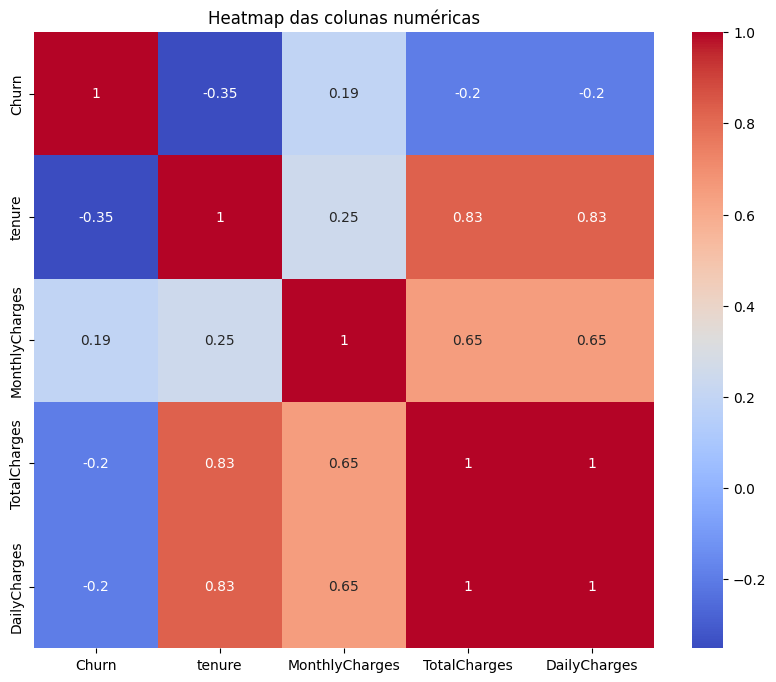

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap das colunas numéricas')
plt.show()

In [28]:
pb_corrs = {}

for var in num_cols:
    # cálculo da correlação ponto-bisserial
    a, b = df_aux[var].values, Churn_lb
    point_biserial_corr = stats.pointbiserialr(a, b)

    # valor da correlação e seu p-valor
    r, p = round(point_biserial_corr.correlation, 2), point_biserial_corr.pvalue

    pb_corrs[var] = r

In [29]:
pd.DataFrame(pb_corrs, ['Churn'])

,Churn,tenure,MonthlyCharges,TotalCharges,DailyCharges
Churn,1.0,-0.35,0.19,-0.2,-0.2


In [30]:
obj_cols = np.array(df.select_dtypes('object').columns[2:])
cols_arr = obj_cols.reshape(4,4)
print(f'{obj_cols} / {cols_arr}')

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod'] / [['gender' 'SeniorCitizen' 'Partner' 'Dependents']
 ['PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity']
 ['OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV']
 ['StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod']]


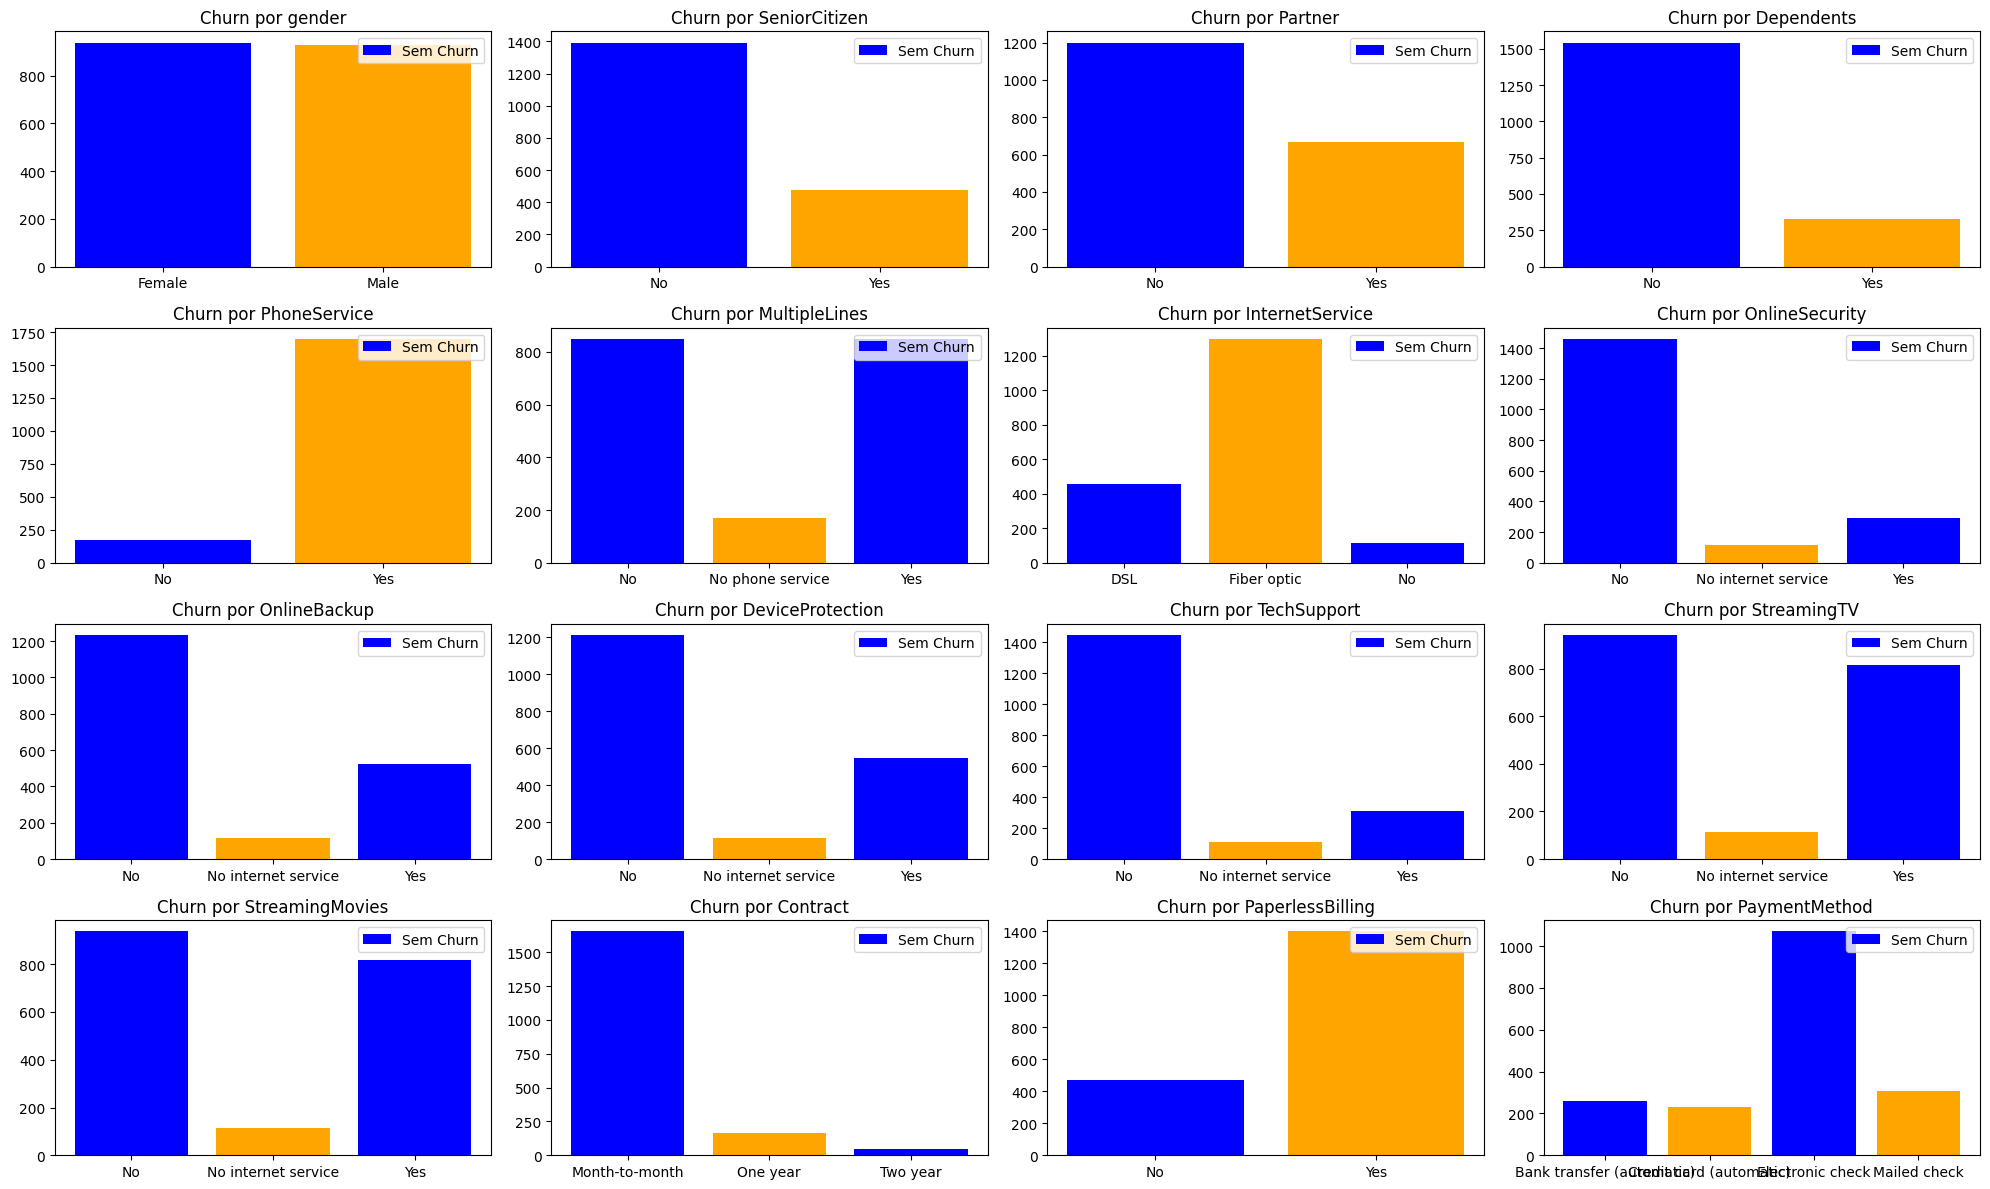

In [31]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)

fig, ax = plt.subplots(cols_arr.shape[0], cols_arr.shape[1], figsize = (20,12))

for i in range(cols_arr.shape[0]):
    for j in range(cols_arr.shape[1]):
        df_churn_col = df_aux.groupby(cols_arr[i, j], as_index=False).agg({'Churn': 'sum'})
        ax[i, j].bar(x=df_churn_col[cols_arr[i, j]], height = df_churn_col['Churn'], data = df_churn_col, color = ['blue', 'orange'])
        
        ax[i, j].set_title(f'Churn por {cols_arr[i, j]}')
        # Adicionando legenda
        ax[i, j].legend(['Sem Churn', 'Com Churn'], loc='upper right')

plt.tight_layout() 

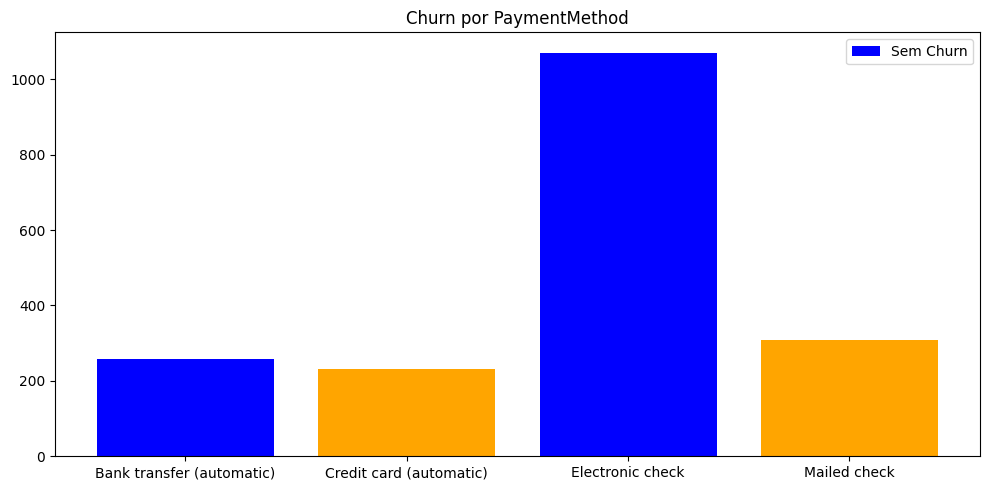

In [32]:
df_aux = df.copy()
df_aux['Churn'] = df_aux['Churn'].apply(lambda x: 0 if x == 'No' else 1)

df_churn_Payment = df_aux.groupby('PaymentMethod', as_index=False).agg({'Churn': 'sum'})
df_churn_Payment

plt.figure(figsize=(10,5))
plt.bar(x= df_churn_Payment['PaymentMethod'], height = df_churn_Payment['Churn'], data = df_churn_Payment, color = ['blue', 'orange'])
plt.title('Churn por PaymentMethod')
# Adicionando legenda
plt.legend(['Sem Churn', 'Com Churn'], loc='upper right')
plt.tight_layout()

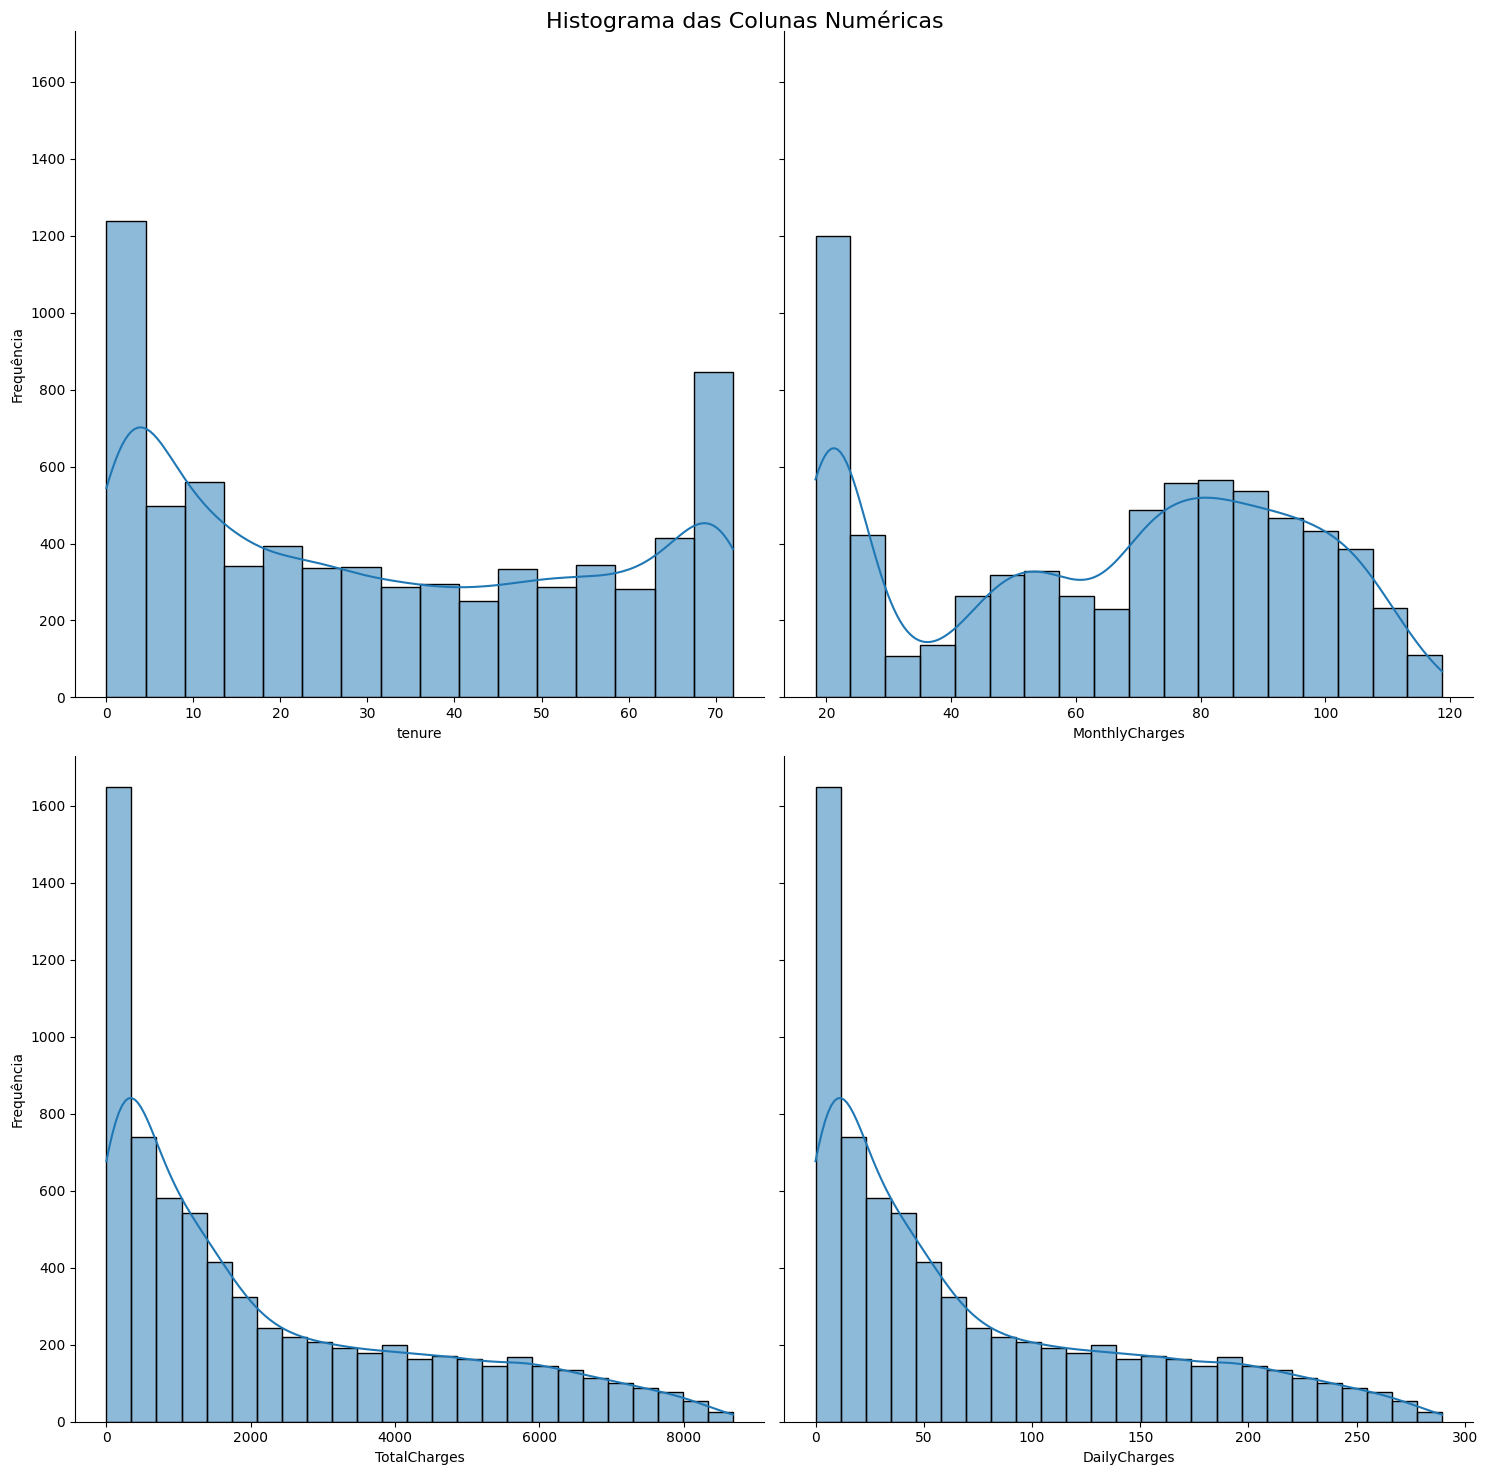

In [33]:
# Criar subplots com 3 linhas e 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)

# Iterar sobre as colunas numéricas e criar os histogramas
for i, col in enumerate(num_cols.columns[1:]):
    row, col_idx = divmod(i, 2)  # Calcular a posição do subplot
    sns.histplot(df[col], ax=axes[row, col_idx], kde=True)
    sns.despine(right=True, top=True)
    #col_name = ' '.join(col.split('.')[1:])
    #print(col_name)
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequência')
    

fig.suptitle('Histograma das Colunas Numéricas', fontsize=16)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()

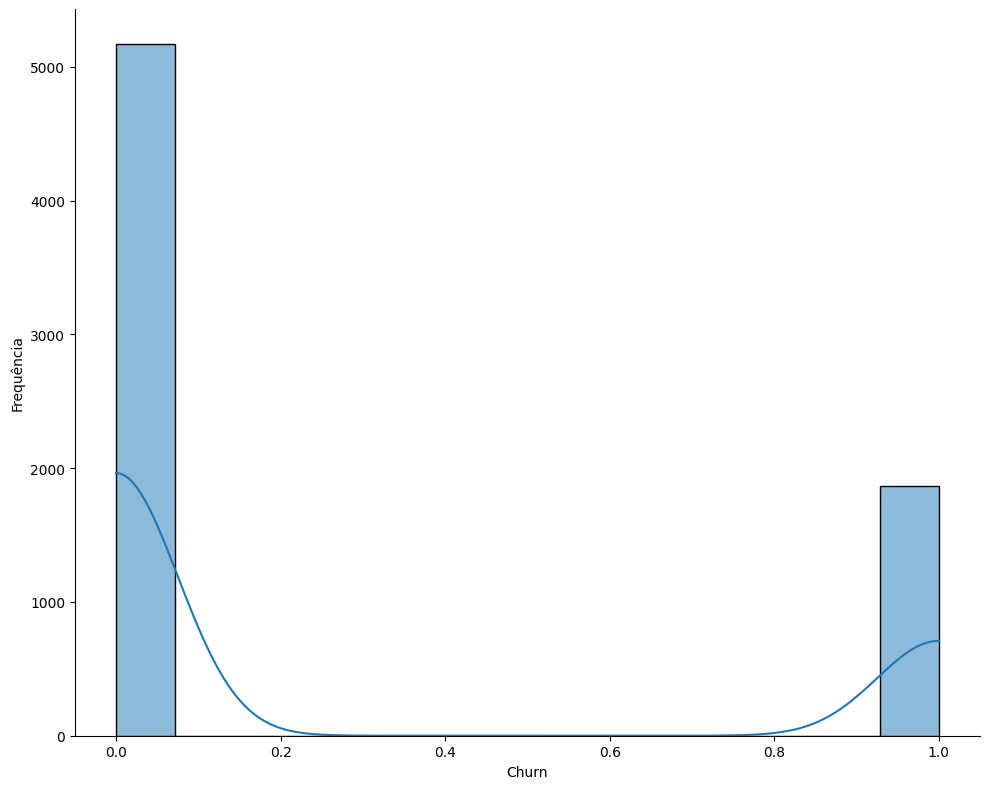

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(df_aux['Churn'], kde=True)
sns.despine(right=True, top=True)
fig.suptitle('Histograma da coluna Churn', fontsize=16)
plt.xlabel('Churn')
plt.ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()



In [35]:
df_lb = df.copy()
df_lb.drop(['customerID'], axis='columns', inplace=True)

In [36]:
lb = LabelEncoder()

In [37]:
cat = df_lb.select_dtypes(include='object').columns
print(cat)

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [38]:
for obj in cat:
    df_lb[obj] = lb.fit_transform(df_lb[obj].astype(str))

In [39]:
df_lb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  
 17  

In [40]:
df_lb.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges
0,0,0,0,1,1,9,1,0,0,0,...,0,2,2,0,1,1,3,65.6,593.30,19.776667
1,0,1,0,0,0,9,1,2,0,0,...,0,0,0,2,0,0,3,59.9,542.40,18.080000
2,1,1,0,0,0,4,1,0,1,0,...,2,0,0,0,0,1,2,73.9,280.85,9.361667
3,1,1,1,1,0,13,1,0,1,0,...,2,0,2,2,0,1,2,98.0,1237.85,41.261667
4,1,0,1,1,0,3,1,0,1,0,...,0,2,2,0,0,1,3,83.9,267.40,8.913333


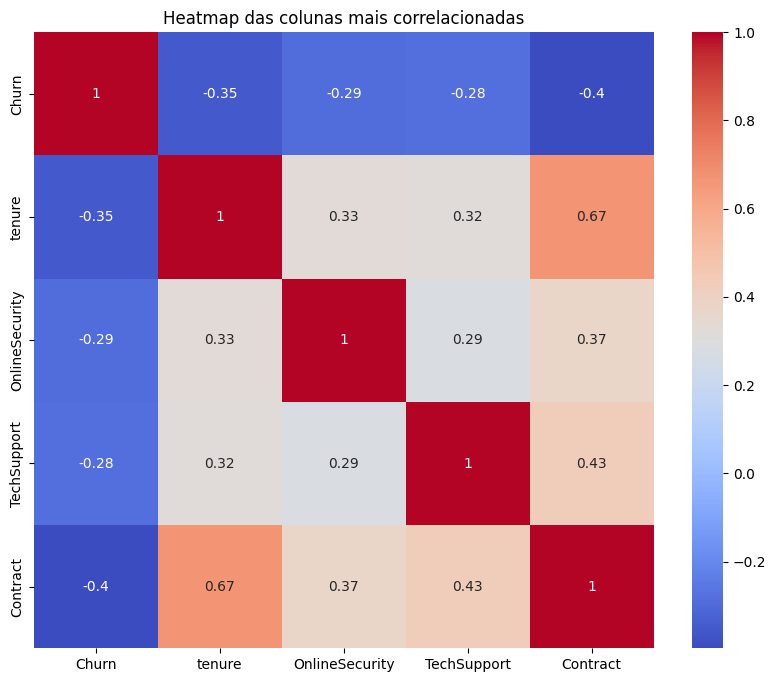

In [41]:
corr = df_lb.corr()

corr_target = corr['Churn'].abs()
high_corr_columns = corr_target[corr_target > 0.20].index

# Lista de colunas a excluir
#colunas_excluir = ['popularity', 'num_scoring_users', 'popularity_x_num_scoring_users', 'mean_x_num_scoring_users']

# Filtrar as colunas, excluindo as indesejadas
#high_corr_columns_filtradas = [col for col in high_corr_columns if col not in colunas_excluir]

if len(high_corr_columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_lb[high_corr_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap das colunas mais correlacionadas')
    plt.show()
else:
    print(f'Tamanho de colunas insuficientes: {len(high_corr_columns_filtradas)}')

# Balanceamento do Churn

Verificando o balanceamento dos dados entre Churn e não Churn e foi identificado um desbalanceamento, sendo assim, caso seguisse para o aprendizado, iria impactar diretamente no resultado final que estaria sendo tendencioso, dessa maneira, foi utilizado a função SMOTE, método que realiza o over-sampling dos dados com menor distribuição, de modo que a distribuição fique equilibrada e balanceada, impedindo que a classe desbalanceada influencie o processo de aprendizado e predição.

<Axes: xlabel='Churn', ylabel='count'>

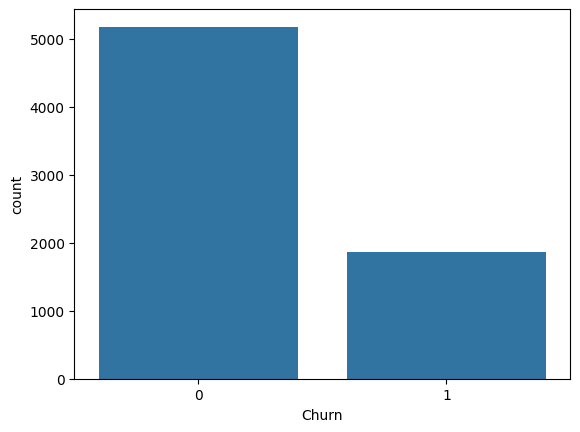

In [42]:
sns.countplot(df_lb, x='Churn', legend=False)

In [43]:
smote = SMOTE(random_state=42)

X = df_lb.drop('Churn', axis=1)
y = df_lb['Churn']

X_res, y_res = smote.fit_resample(X, y)

<Axes: xlabel='Churn', ylabel='count'>

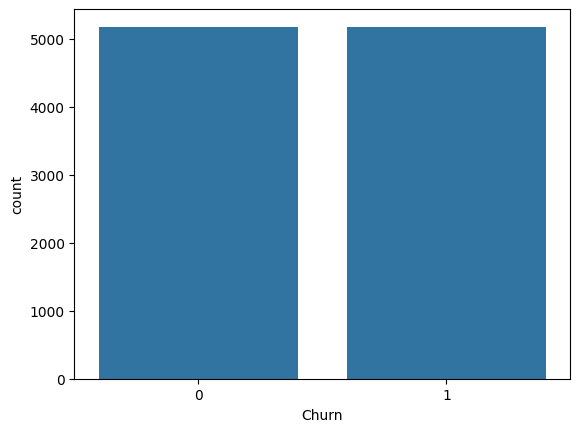

In [44]:
sns.countplot(x=y_res, legend=False)

In [45]:
X_res['Churn'] = y_res

balanced_df = X_res.copy()
balanced_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,DailyCharges,Churn
0,0,0,1,1,9,1,0,0,0,2,...,2,2,0,1,1,3,65.6,593.30,19.776667,0
1,1,0,0,0,9,1,2,0,0,0,...,0,0,2,0,0,3,59.9,542.40,18.080000,0
2,1,0,0,0,4,1,0,1,0,0,...,0,0,0,0,1,2,73.9,280.85,9.361667,1
3,1,1,1,0,13,1,0,1,0,2,...,0,2,2,0,1,2,98.0,1237.85,41.261667,1
4,0,1,1,0,3,1,0,1,0,0,...,2,2,0,0,1,3,83.9,267.40,8.913333,1


# Métricas

Utilizando as métricas tradicionais de acurácia, precisão, recall e F1 conseguimos identificar o desempenho do nosso algoritmo de classificação escolhido, no caso, Random Forest Classificator, por ser um método de classificação, também pode ser utilizado a matriz de confusão, reforçando as métricas de avaliação de desempenho.

In [46]:
def metricas(y_test, y_pred):
    print(f'Acurácia: ', metrics.accuracy_score(y_test, y_pred))
    print(f'Precisão: ', metrics.precision_score(y_test, y_pred, average='micro'))
    print(f'Recall: ', metrics.recall_score(y_test, y_pred, average='micro'))
    print(f'F1: ', metrics.f1_score(y_test, y_pred, average='micro'))
    
def conf_matrix(cm, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()

def metricas_ajustadas(y_test, y_pred):
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_ajustado = adjusted_r2(y_test, y_pred, X_train)
    mae = mean_absolute_error(y_test,y_pred)
    MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    RMSLE = mean_squared_log_error(y_test,y_pred)


    print(50*'-')
# Mínimo de 0 e sem máximo, média dos erros das previsões ao quadrado
    print(f'Mean Squared Error: {mse}')
# Mínimo de 0 e sem máximo, média dos erros das previsões ao quadrado
    print(f'Raiz Mean Squared Error: {rmse}')
# R2 varia entre 0 e 1
    print(f'R2 Score: {r2}')
# R2 ajustado varia entre 0 e 1, porém menor do que o R2
    print(f'R2 Ajustado: {r2_ajustado}')
# Média entre as distâncias dos valores reais com o predito, quanto menor o valor melhor
    print(f'MAE: {mae}')
# Real menos o predito dividido pelo real, representando a distância em porcentagem, quanto menor melhor
    print(f"Valor do MAPE dado em percentual: {MAPE}")
    print(f'RMSLE: {RMSLE}')
    
def cross_validate(mode, X, y, cv, scoring):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

# Exibir os resultados da validação cruzada
    print(f"R² por fold: {cv_scores}")
    print(f"R² médio: {np.mean(cv_scores)}")
    print(f"Desvio padrão do R²: {np.std(cv_scores)}")
    
def adjusted_r2(y_test, y_pred, X_train):
    adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
    return adj_r2

def graficos_residuos(y_test, y_pred):
    # Calcular os resíduos (diferença entre os valores reais e os previstos)
    residuos = y_test - y_pred
    # Plotar a distribuição dos resíduos
    plt.figure(figsize=(10, 6))
    sns.histplot(residuos, kde=True)
    plt.title('Distribuição dos Resíduos')
    plt.xlabel('Resíduos')
    plt.ylabel('Frequência')
    plt.show()

# Plotar os resíduos em relação aos valores previstos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Resíduos vs Valores Previstos')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.show()

In [47]:
X = X_res.drop('Churn', axis=1)
y = X_res['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
metricas(y_test, y_pred)

Acurácia:  0.8466988727858293
Precisão:  0.8466988727858293
Recall:  0.8466988727858293
F1:  0.8466988727858292


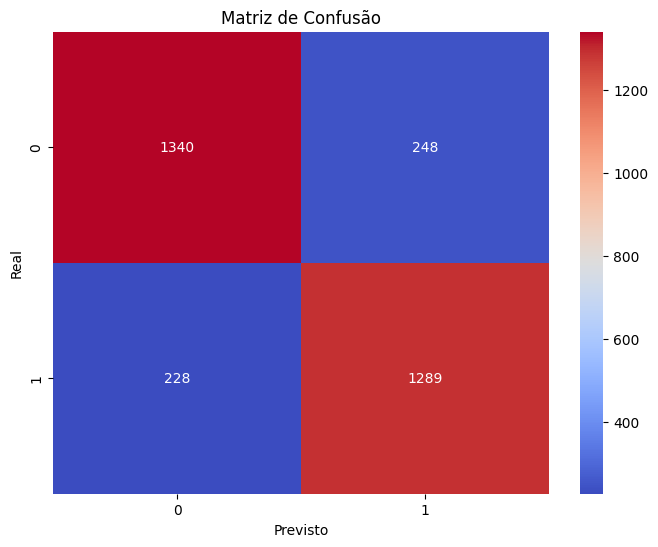

In [49]:
# 5. Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Resultados

Observando as métricas, é possível afirmar que possuem valores com grandeza significativa para indicar que o modelo está prevendo adequadamente os resultados, além da matriz de confusão, reforçar que essa mesma previsão está sendo feita adequadamente, em especial, para esse modelo de negócio, no qual, é mais interessante que o cliente com verdadeiro positivo seja identificado corretamente, em detrimento, de um número maior de falsos positivos.

Porém, o que chama a atenção é o fato da matriz de confusão, mas principalmente, as métricas possuirem valores iguais ou muito próximos, contudo isso ocorre justamente pelo balanceamento via SMOTE que foi realizado na coluna target Churn, impactando nos resultados, porém garantindo que um método eficiente de previsão fosse criado. Fator que podemos verificar pela Curva ROC traçada logo abaixo, identificando que o fator de previsão se encontra bem alto e ajustado, bem acima do esperado em comparação a um método de classificação aleatório.

In [50]:
roc_auc = roc_auc_score(y_test, y_pred)

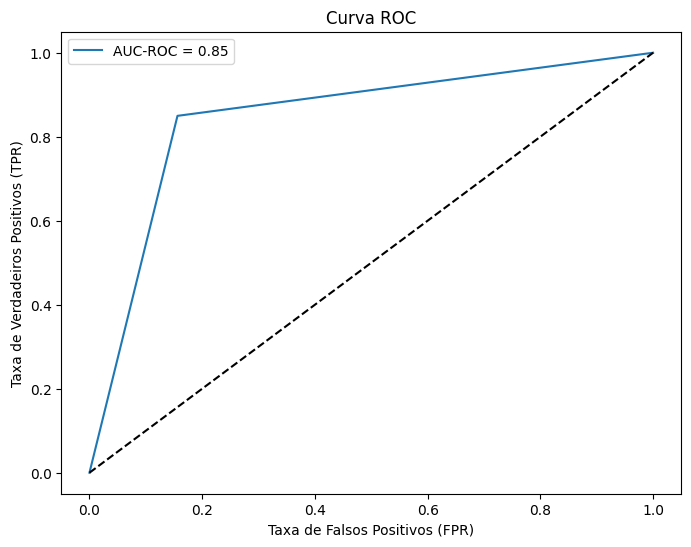

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Variáveis

Por fim, o método de previsão permite identificar a importância de cada coluna dentro dos valores previstos e, então, foi identificado que o principal fator referente a ocorrência de Churn é o método de contrato, sendo o método mensal o mais favorável para a ocorrência de desistência por parte do consumidor, seguido por tenure, que seria como um período de carência para manutenção do contrato.

In [52]:
importances = model.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]

n_features = min(len(importances), len(features))

print("Variáveis mais importantes:")
for i in range(n_features):
    if importances[indices[i]] < 0.0001:
        continue
    else:
        print(f"{features[indices[i]]}: {importances[indices[i]]}")

Variáveis mais importantes:
MonthlyCharges: 0.12078421526755867
Contract: 0.11364293657312209
tenure: 0.10980910117965266
TotalCharges: 0.10706301965925852
DailyCharges: 0.10560079691393065
OnlineSecurity: 0.08304955734781759
TechSupport: 0.06348217145639216
PaymentMethod: 0.03879171632291534
InternetService: 0.034519719454104834
OnlineBackup: 0.034363821508380195
DeviceProtection: 0.03131528360545781
Dependents: 0.029378056589357538
Partner: 0.026374513340889586
gender: 0.01955499775574143
MultipleLines: 0.0183572027563167
PaperlessBilling: 0.015486714463052225
StreamingMovies: 0.015421502361852458
StreamingTV: 0.015051230137403577
SeniorCitizen: 0.01222048189162429
PhoneService: 0.0057329614151715525


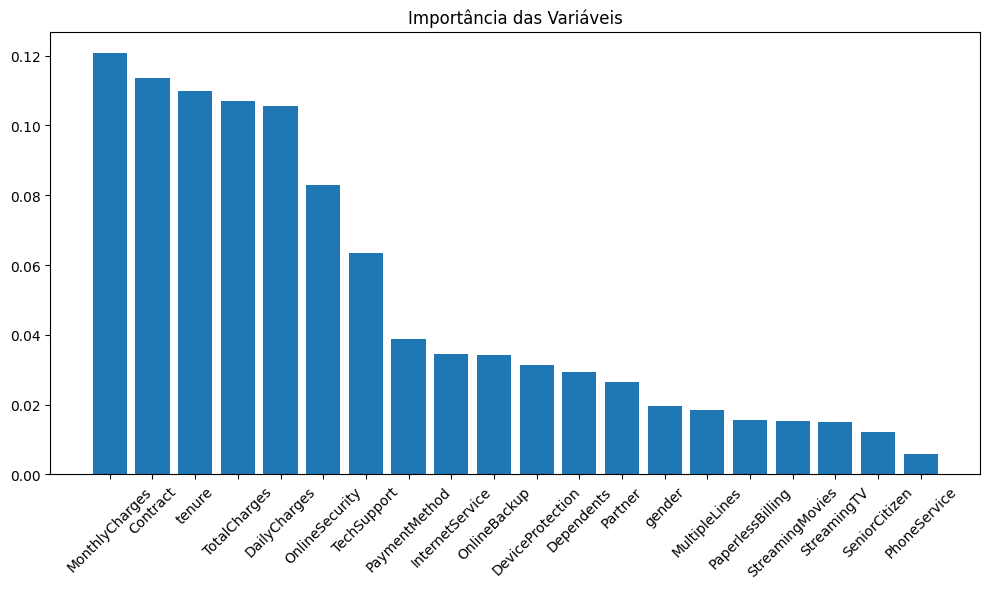

In [53]:
# Ordenar as importâncias em ordem decrescente
indices = np.argsort(importances)[::-1]

# Número de variáveis
n_features = min(len(importances), len(features))

# Filtrar variáveis importantes com base em um limite de importância
important_indices = [i for i in indices if importances[i] >= 0.0001]

# Plotar o gráfico de barras das variáveis mais importantes
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis")
plt.bar(range(len(important_indices)), importances[important_indices], align="center")
plt.xticks(range(len(important_indices)), [features[i] for i in important_indices], rotation=45)
plt.tight_layout()
plt.show()

# Melhorias

A análise executada nesse notebook trata-se de um mapeamento inicial sobre possíveis fatores motivadores para a ocorrência de Churn em empresas de telefonia, porém, existem diversos possíveis pontos de melhorias no método utilizado, tais como, melhor tratamento dos dados, identificação adequada das linhas vazias, preenchimento com um maior número de informações, realização de comparativos para métodos de under-sampling e over-sampling dentro da coluna Churn, além do teste de diferentes métodos de aprendizado, buscando aquele que melhor se adequa a base de dados fornecidas, e portanto, apresenta as melhores métricas.

Tais melhorias podem eliminar características encontradas como métricas identicas, colunas de importância altamente relacionadas, entre outras.

Portanto, caso deseje dar continuidade ao estudo e trazer melhorias aos pontos apresentados ou quaisquer outros, sintam-se livres para utilização da base de dados fornecida e, caso deseje, estou a disposição para contato e discussão sobre o assunto.